## Monte Carlo simulatie

Bij toestellen van het type TX-SKY-INTERFACE en TX-GO gebruikt partij Transics een schakeling van vier condensatoren in serie.  

Zoals gekend kan de vervangcapaciteit berekend worden als: 

$$
\frac{1}{C_t} = \frac{1}{C_1} + \frac{1}{C_2} + \frac{1}{C_3} + \frac{1}{C_4}
$$

Bij een totale spanning van $V_t$ over de condenatoren kan de spanning over een individuele condensator als volgt berekend worden:

$$
V_x = \frac{C_t}{C_x}V_t
$$

De totale spanning is 10,6 V. Indien de vier condensatoren dezelfde capaciteit hebben, verdeelt de spanning zich gelijkmatig en staat over elke condensator een spanning van 2,65 V. Echter: het productieproces van de condensatoren zorgt voor een gaussiaanse verdeling van de capaciteiten met een gemiddelde van 15,9 F en een standaarddeviatie van 0,4985 F. Indien over een condensator een spanning komt te staan van meer dan 2,7 V ontstaat een risico op lekken en het falen van de PCB. 

Onderstaande Python-notebook berekent via een Monte-Carlo simulatie het percentage van de schakelingen (van 4 condensatoren) waarbij over minstens één condensator een spanning komt te staan van > 2,7V. 

In [14]:
# parameters
condensators = 4
avg = 15.9
sigma = 0.4985
samplesize = 100000 # simuleer met 100.000 x 4 condensatoren. 
V_tot = 10.6
threshold = 2.7

In [15]:
import sys
import numpy as np

def MaxVoltage(C,V_tot): 
    # determine maximum voltage for array of condensators en V_tot
    nominator = 0.0
    for c in C:
        nominator += 1/c

    C_tot =  1/nominator
    V = [C_tot/c * V_tot for c in C]
    return max(V)


samples = np.random.normal(loc=avg,scale=sigma,size=(samplesize,condensators))
n = 0
V_max = np.empty((0),dtype=float)
for sample in samples:

    if (min(sample) >= 13.5) & (max(sample) <= 19.5):
        n += 1
        V_max = np.r_[V_max,[MaxVoltage(sample,V_tot)]]
    else:
        print(min(sample),max(sample))

V_max = np.sort(V_max)    

print(f'Totaal aantal samples van {condensators} condensatoren weerhouden: {n}')

print(f'Percentage boven drempel: {(V_max > threshold).sum()*100/n} %')




Totaal aantal samples van 4 condensatoren weerhouden: 100000
Percentage boven drempel: 80.401 %


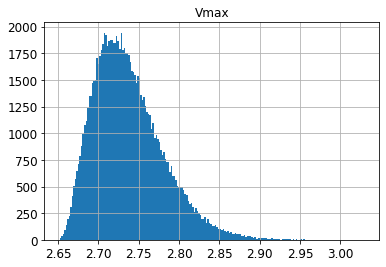

In [16]:
# plotting histogram
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
V_max_df =  pd.DataFrame(V_max,columns=['Vmax'])
V_max_df.hist(bins=200)
plt.show()

In [17]:
# getting data of the histogram
count, bins_count = np.histogram(V_max, bins=200)
count[:20],bins_count[:20]


(array([  14,   32,   55,   95,  137,  191,  225,  311,  407,  503,  571,
         645,  709,  790,  880,  992, 1076, 1114, 1241, 1349], dtype=int64),
 array([2.65193126, 2.65381744, 2.65570363, 2.65758981, 2.65947599,
        2.66136217, 2.66324835, 2.66513453, 2.66702072, 2.6689069 ,
        2.67079308, 2.67267926, 2.67456544, 2.67645162, 2.67833781,
        2.68022399, 2.68211017, 2.68399635, 2.68588253, 2.68776871]))

In [18]:
# finding the PDF (Probability Distribution Function) of the histogram using count values
pdf = count / sum(count)
pdf[:20]

  


array([0.00014, 0.00032, 0.00055, 0.00095, 0.00137, 0.00191, 0.00225,
       0.00311, 0.00407, 0.00503, 0.00571, 0.00645, 0.00709, 0.0079 ,
       0.0088 , 0.00992, 0.01076, 0.01114, 0.01241, 0.01349])

In [19]:
# using numpy np.cumsum to calculate the CDF
cdf = np.cumsum(pdf)
cdf[:20]
  


array([0.00014, 0.00046, 0.00101, 0.00196, 0.00333, 0.00524, 0.00749,
       0.0106 , 0.01467, 0.0197 , 0.02541, 0.03186, 0.03895, 0.04685,
       0.05565, 0.06557, 0.07633, 0.08747, 0.09988, 0.11337])

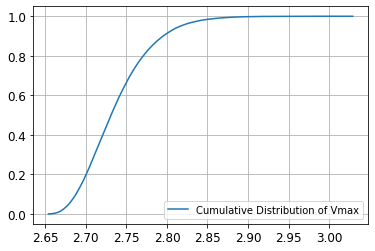

In [20]:
# plotting CDF
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.plot(bins_count[1:], cdf, label="Cumulative Distribution of Vmax")
plt.legend()
plt.grid()
plt.show()